In [1]:
# Import package
from urllib.request import urlretrieve
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = 'PS_20174392719_1491204439457_log.csv'
path = '../Data/'

In [3]:
paysim = pd.read_csv(path+file)

In [4]:
paysim.shape

(6362620, 11)

In [5]:
paysim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
paysim.isnull().values.any()

False

In [7]:
# Determine Null values
paysim.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
# rename type, is a reserved python word & inconsistent column name 
paysim.rename(columns={'type':'transType', 'oldbalanceOrg': 'oldbalanceOrig'}, inplace=True)
paysim.head()

,step,transType,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [9]:
print(format(paysim.transType.value_counts()),",")

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: transType, dtype: int64 ,


In [10]:
print(format(paysim.isFraud.value_counts()),",")

0    6354407
1       8213
Name: isFraud, dtype: int64 ,


In [11]:
# Origination to Destination does not match
print('Orgination:  ' + format(paysim.nameOrig.nunique(), ','))
print('Destination: ' + format(paysim.nameDest.nunique(), ','))

Orgination:  6,353,307
Destination: 2,722,362


In [12]:
paysim['diffBalanceOrig'] = paysim.newbalanceOrig + paysim.amount - paysim.oldbalanceOrig
paysim['diffBalanceDest'] = paysim.oldbalanceDest + paysim.amount - paysim.newbalanceDest

In [13]:
paysim.head()

,step,transType,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,diffBalanceOrig,diffBalanceDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0.0,9839.64
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0.0,1864.28
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0.0,181.00
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0.0,21363.00
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0.0,11668.14


In [14]:
paysim.transType.value_counts(normalize=True)

CASH_OUT    0.351663
PAYMENT     0.338146
CASH_IN     0.219923
TRANSFER    0.083756
DEBIT       0.006512
Name: transType, dtype: float64

<AxesSubplot:ylabel='isFraud'>

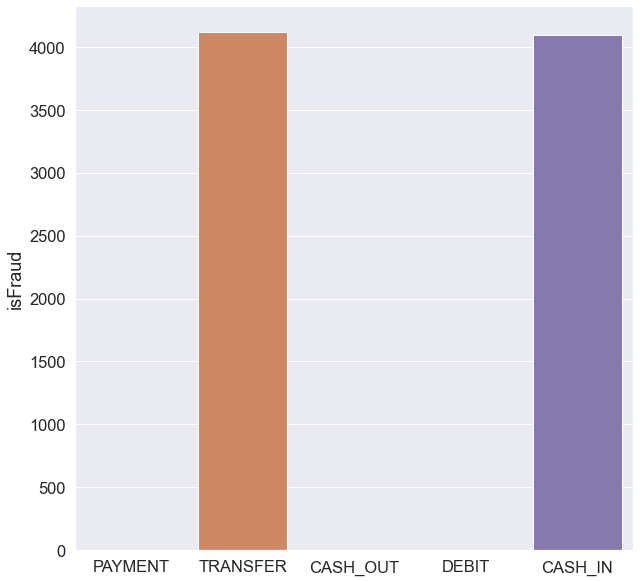

In [15]:
sns.set(font_scale = 1.5)
plt.figure(figsize=(10,10))
sns.barplot(x=paysim.transType.unique(),y=paysim.groupby("transType")["isFraud"].sum())

In [16]:
#  All the Fruad is in Transfer and Cash_In transaction types
paysim.drop(['isFlaggedFraud', 'nameOrig', 'nameDest'], axis=1, inplace=True)

In [17]:
paysim.head()

,step,transType,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,diffBalanceOrig,diffBalanceDest
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0.0,9839.64
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0.0,1864.28
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0.0,181.00
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0.0,21363.00
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0.0,11668.14


In [18]:
# Add dummy columns
paysim[['cash_out','payment','cash_in','transfer','debit']] = [0.0,0.0,0.0,0.0,0.0]

In [19]:
cols = ['cash_out','payment','cash_in','transfer','debit']
for col in cols:
    paysim.loc[paysim['transType'] == str.upper(col), col] = 1.0

In [20]:
paysim.head(10)

,step,transType,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,diffBalanceOrig,diffBalanceDest,cash_out,payment,cash_in,transfer,debit
0,1,PAYMENT,9839.64,170136.00,160296.36,0.0,0.00,0,0.00,9839.64,0.0,1.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,21249.00,19384.72,0.0,0.00,0,0.00,1864.28,0.0,1.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,181.00,0.00,0.0,0.00,1,0.00,181.00,0.0,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,181.00,0.00,21182.0,0.00,1,0.00,21363.00,1.0,0.0,0.0,0.0,0.0
4,1,PAYMENT,11668.14,41554.00,29885.86,0.0,0.00,0,0.00,11668.14,0.0,1.0,0.0,0.0,0.0
5,1,PAYMENT,7817.71,53860.00,46042.29,0.0,0.00,0,0.00,7817.71,0.0,1.0,0.0,0.0,0.0
6,1,PAYMENT,7107.77,183195.00,176087.23,0.0,0.00,0,0.00,7107.77,0.0,1.0,0.0,0.0,0.0
7,1,PAYMENT,7861.64,176087.23,168225.59,0.0,0.00,0,0.00,7861.64,0.0,1.0,0.0,0.0,0.0
8,1,PAYMENT,4024.36,2671.00,0.00,0.0,0.00,0,1353.36,4024.36,0.0,1.0,0.0,0.0,0.0
9,1,DEBIT,5337.77,41720.00,36382.23,41898.0,40348.79,0,0.00,6886.98,0.0,0.0,0.0,0.0,1.0


In [21]:
y = paysim['isFraud'].values

In [22]:
type(y)

numpy.ndarray

In [23]:
paysim['payment'].sum(),paysim['cash_out'].sum(),paysim['cash_in'].sum(),paysim['transfer'].sum(),paysim['debit'].sum()

(2151495.0, 2237500.0, 1399284.0, 532909.0, 41432.0)

In [24]:
# Save as CSV
# paysim.to_csv(path+'engineered.csv')

In [25]:
fraud = paysim.drop(['transType'], axis=1)

In [26]:
fraud.head()

,step,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,diffBalanceOrig,diffBalanceDest,cash_out,payment,cash_in,transfer,debit
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0.0,9839.64,0.0,1.0,0.0,0.0,0.0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0.0,1864.28,0.0,1.0,0.0,0.0,0.0
2,1,181.00,181.0,0.00,0.0,0.0,1,0.0,181.00,0.0,0.0,0.0,1.0,0.0
3,1,181.00,181.0,0.00,21182.0,0.0,1,0.0,21363.00,1.0,0.0,0.0,0.0,0.0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0.0,11668.14,0.0,1.0,0.0,0.0,0.0


<AxesSubplot:>

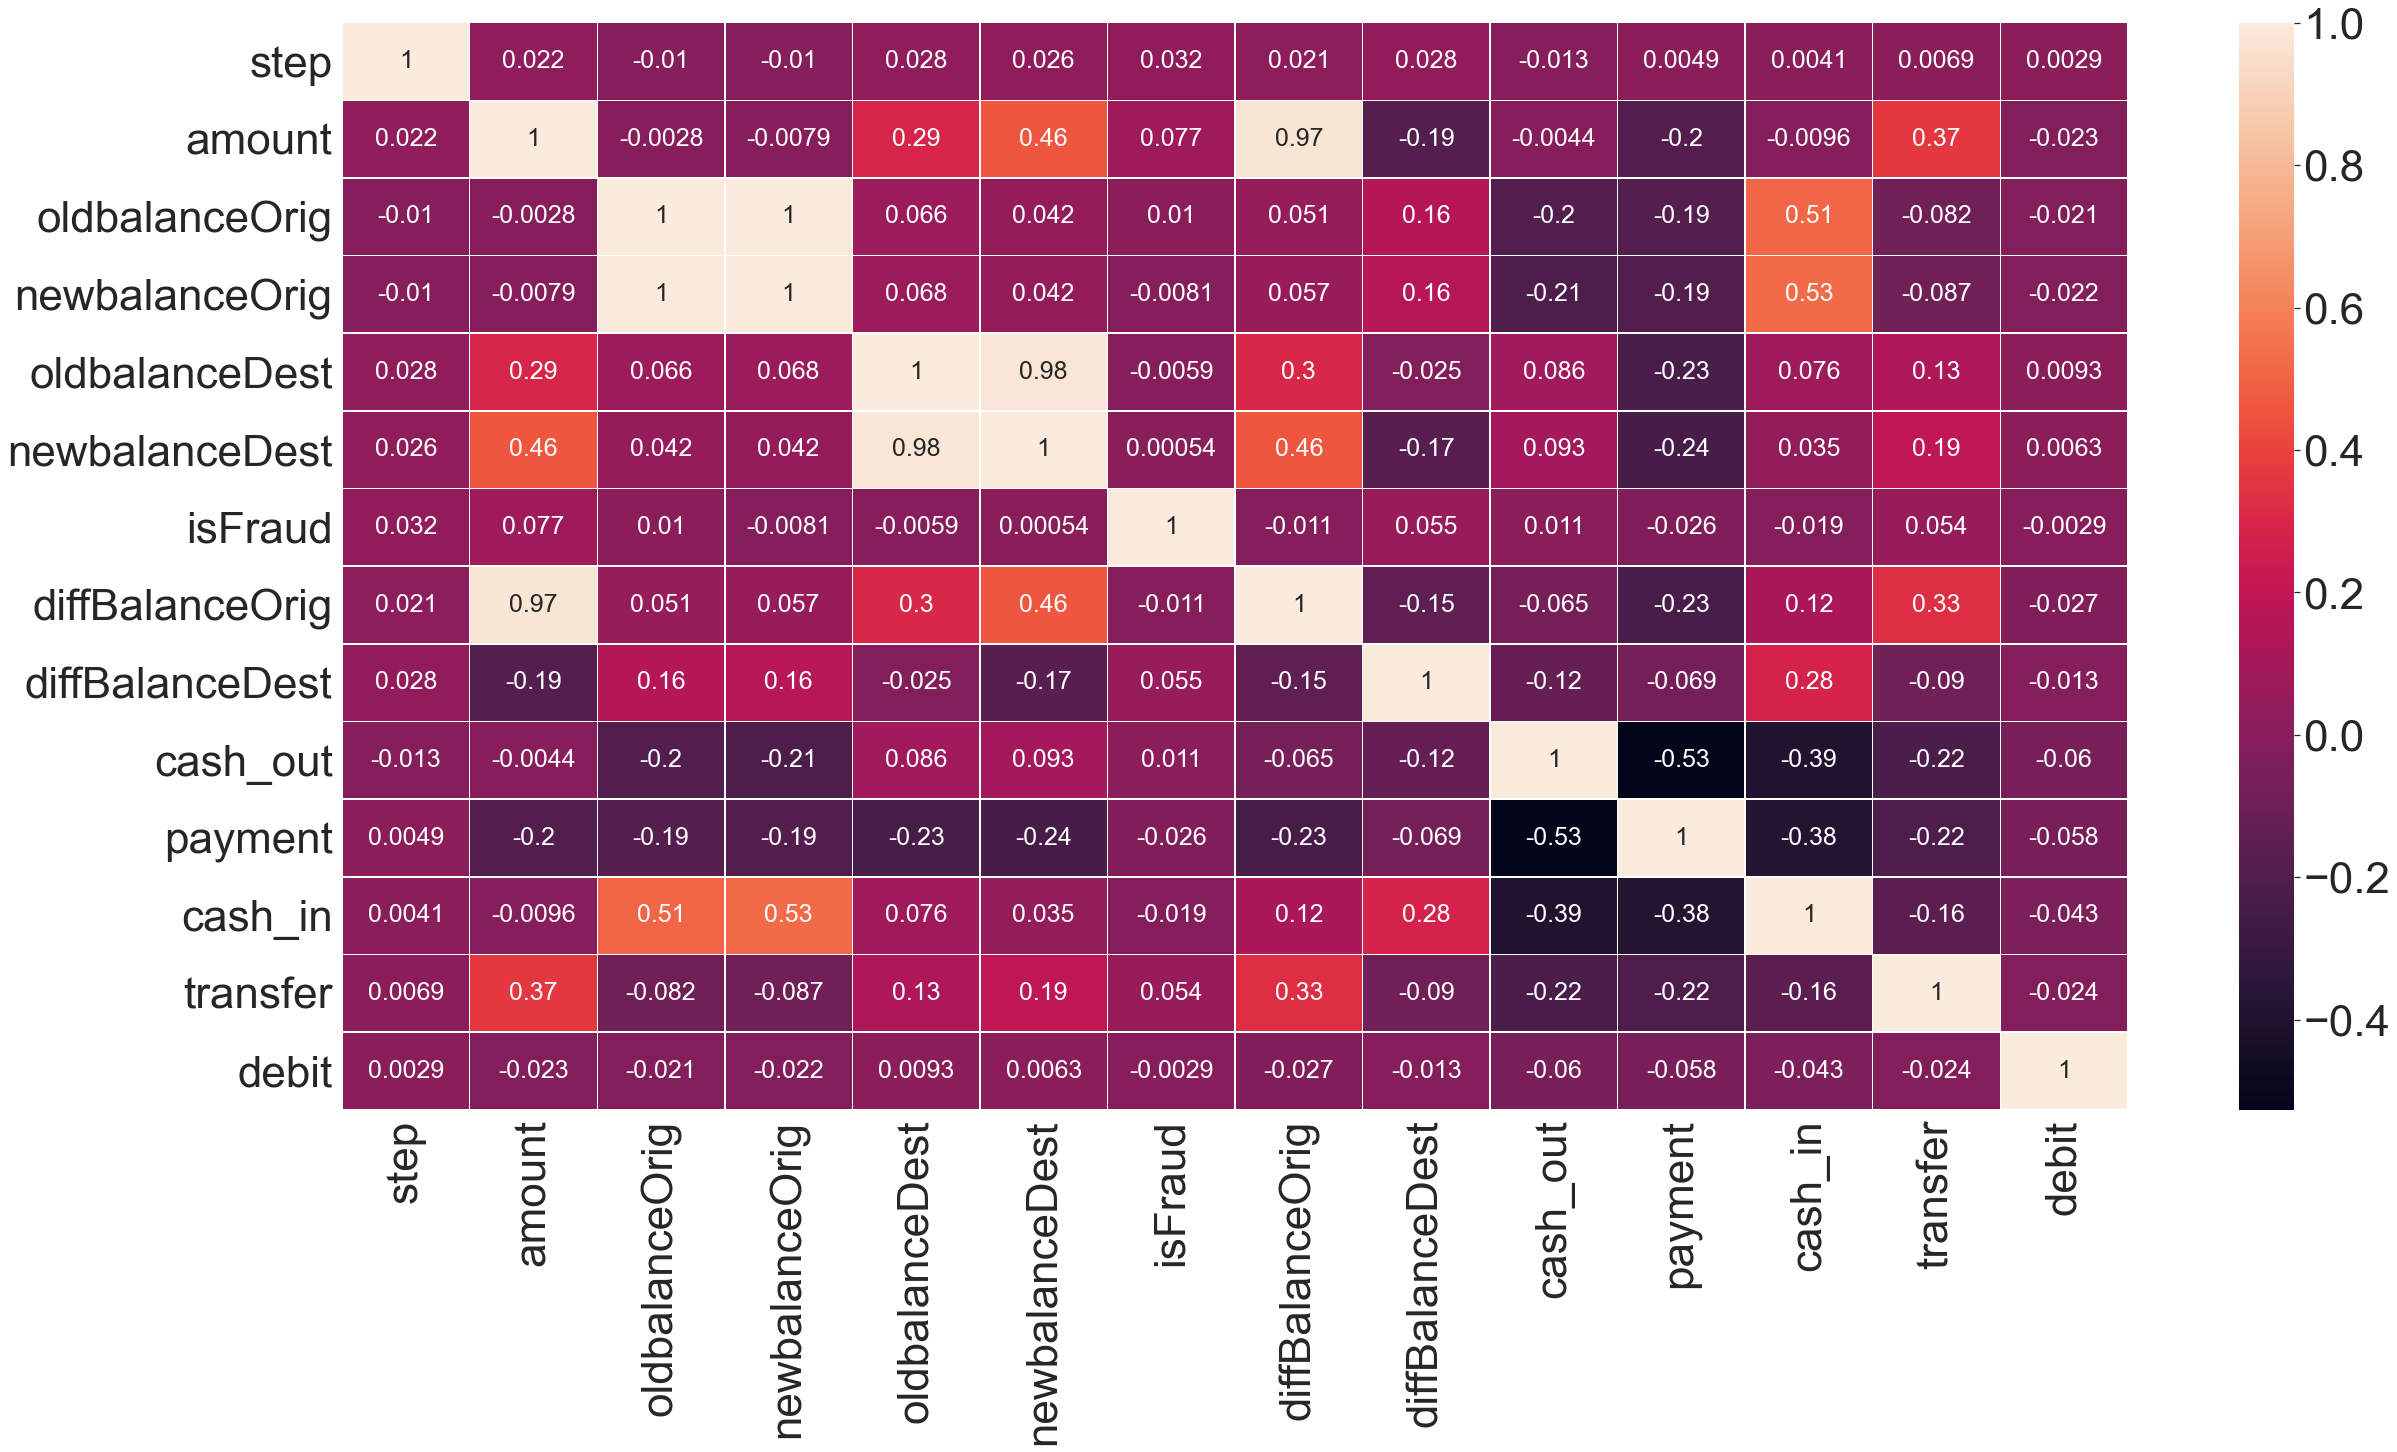

In [27]:
# Make a heatmap of the data
plt.figure(figsize=(40,20))
sns.set(font_scale = 4)
sns.heatmap(fraud.corr(), annot=True, linewidths=.5, annot_kws={"size":25})